In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
import ENDF6

In [3]:
#get some cross section data
f = open('xn_data/n-014_Si_028.endf')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=4, MT=2)  # elastic angular distributions. 
#x, y = ENDF6.read_table(sec)

In [4]:
for i in sec:
    #print(i)
    arr = np.char.split(i)
    #print(np.shape(arr))
    if(np.shape(arr)==()): continue
    #print([np.fromstring(x) for x in arr])

In [5]:
print(ENDF6.list_content(sec))

{(1425, 4, 2)}


In [6]:
sec_el = ENDF6.find_section(lines, MF=3, MT=2)

f.close()

In [7]:
Eel, sigel = ENDF6.read_table(sec_el)

In [8]:
print(Eel)
print(sigel)

[1.00e-05 2.53e-02 1.00e+03 ... 1.46e+08 1.48e+08 1.50e+08]
[0.        0.        0.        ... 0.3265487 0.3183026 0.31026  ]


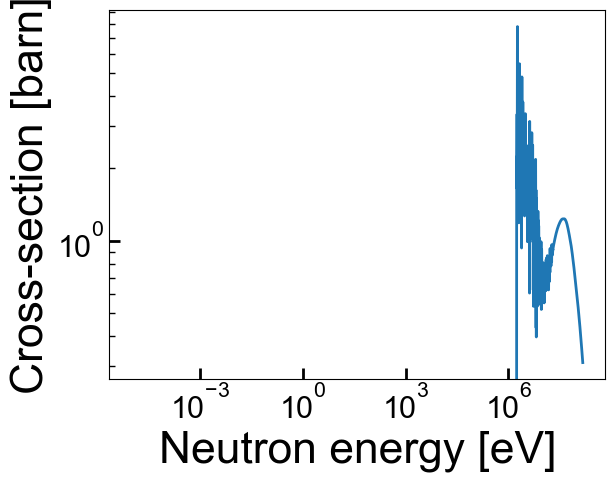

In [9]:
from pylab import *
#plot quick
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(Eel, sigel)
ax1.set_yscale('log')
ax1.set_xscale('log')
xlabel('Neutron energy [eV]')
ylabel('Cross-section [barn]')
show()

In [10]:
sec_res = ENDF6.find_section(lines, MF=2, MT=151)

In [11]:
for i in sec_res:
    print(i)
    arr = np.char.split(i)
    #print(np.shape(arr))
    if(np.shape(arr)==()): continue
    #print([np.fromstring(x) for x in arr])

 1.402800+4 2.773700+1          0          0          1          01425 2151

 1.402800+4 1.000000+0          0          0          1          01425 2151

 1.000000-5 1.750000+6          1          3          0          11425 2151

 0.000000+0 4.136400-1          1          0          3          31425 2151

 2.773700+1 4.136400-1          0          0         96         161425 2151

-3.622100+6 5.000000-1 3.936200+6 1.453600+2 0.000000+0 0.000000+01425 2151

-8.737300+5 5.000000-1 1.015100-1 1.025300+0 0.000000+0 0.000000+01425 2151

-3.652900+5 5.000000-1 3.040600-2 1.000000+0 0.000000+0 0.000000+01425 2151

-6.315900+4 5.000000-1 4.689400-2 1.000000+0 0.000000+0 0.000000+01425 2151

-4.880100+4 5.000000-1 9.249600-3 1.000000+0 0.000000+0 0.000000+01425 2151

 5.567700+4 5.000000-1 6.533100+2 1.580300+0 0.000000+0 0.000000+01425 2151

 1.816200+5 5.000000-1 3.489400+4 5.600000+0 0.000000+0 0.000000+01425 2151

 3.013100+5 5.000000-1 2.354800+0 3.600000+0 0.000000+0 0.000000+01425 2151


In [12]:
import pandas as pds
si28_elastic = pds.read_csv('xn_data/si28_el.txt', skiprows=11,skipfooter=2, \
                         names=['neutE', 'xn'],sep='\s+',engine='python')

print (si28_elastic.head(100))

si29_elastic = pds.read_csv('xn_data/si29_el.txt', skiprows=11,skipfooter=2, \
                         names=['neutE', 'xn'],sep='\s+',engine='python')

si30_elastic = pds.read_csv('xn_data/si30_el.txt', skiprows=11,skipfooter=2, \
                         names=['neutE', 'xn'],sep='\s+',engine='python')

           neutE         xn
0   1.000000e-11  21.140900
1   1.103040e-11  20.136800
2   1.216690e-11  19.181200
3   1.342060e-11  18.271700
4   1.480340e-11  17.406100
..           ...        ...
95  5.233710e-02   0.347107
96  5.253350e-02   0.298133
97  5.276270e-02   0.238583
98  5.313930e-02   0.138537
99  5.325390e-02   0.108867

[100 rows x 2 columns]


In [13]:
si28_neute = np.asarray(si28_elastic["neutE"],dtype=float)
si28_xn = np.asarray(si28_elastic["xn"],dtype=float)

si29_neute = np.asarray(si29_elastic["neutE"],dtype=float)
si29_xn = np.asarray(si29_elastic["xn"],dtype=float)

si30_neute = np.asarray(si30_elastic["neutE"],dtype=float)
si30_xn = np.asarray(si30_elastic["xn"],dtype=float)

In [14]:
d = diff(si28_neute)
d=np.append(d,0)
print(np.shape(d))
print(d[d<=0])
si28_neute = si28_neute[d>0]
si28_xn = si28_xn[d>0]

import scipy
si28f=scipy.interpolate.UnivariateSpline(
        si28_neute,
        si28_xn,
        k=3,
        s=0,
        check_finite=True)


(5159,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print(si28f([3,4]))

[1.72299023 1.81369105]


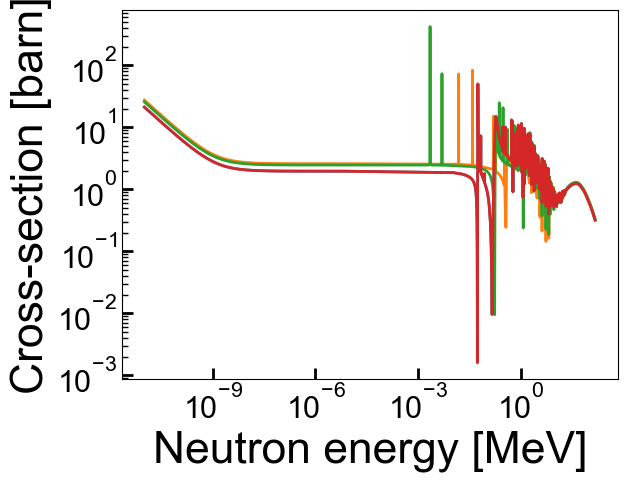

In [16]:
#plot quick
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(si28_neute, si28_xn)
plot(si29_neute, si29_xn)
plot(si30_neute, si30_xn)
plot(si28_neute,si28f(si28_neute))
ax1.set_yscale('log')
ax1.set_xscale('log')
xlabel('Neutron energy [MeV]')
ylabel('Cross-section [barn]')
show()

In [17]:
sec = ENDF6.find_section(lines, MF=4, MT=2)
for i in sec:
    #print(i)
    arr = np.char.split(i)
    #print(np.shape(arr))
    if(np.shape(arr)==()): continue
    #print([np.fromstring(x) for x in arr])

In [18]:
arr=np.str_.split(sec[3])
num=int(arr[0])
print(num)
al = np.zeros((num,12))

413


In [19]:
print(np.shape(al))

(413, 12)


In [20]:
readl=True
linecnt=0
ecnt=0
tote=num
mpoles=0
for ln in sec[4:-1]:
    print(ln)
    #break away if you're done reading e points
    if ecnt==tote:
      break
    #read the number of multipoles
    if readl:
      arr=np.str_.split(ln)
      mpoles=int(arr[4])
      print(mpoles)
      readl=False
    else:
      #arr=np.str_.split(ln)
      a = ENDF6.read_line(ln)
      print(a)
      i1=linecnt*6
      i2=i1+6
      print(i1,i2)
      al[ecnt,i1:i2] = a
      #ecnt+=1
      linecnt+=1
      if linecnt==np.ceil(mpoles/6.0):
         linecnt=0
         ecnt+=1
         readl=True
        
    arr = np.char.split(ln)
    #print(np.shape(arr))
    if(np.shape(arr)==()): continue
    #print([np.fromstring(x) for x in arr])

 0.000000+0 1.000000-5          0          0          2          01425 4  2

2
 0.000000+0 0.000000+0                                            1425 4  2

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0 6
 0.000000+0 4.000000+4          0          0          4          01425 4  2

4
 2.935700-2 3.573400-4 4.154000-5 0.000000+0                      1425 4  2

[0.029357, 0.00035734, 4.154e-05, 0.0, 0.0, 0.0]
0 6
 0.000000+0 5.200000+4          0          0          4          01425 4  2

4
 5.718200-2 1.386800-3 6.333900-5 0.000000+0                      1425 4  2

[0.057182, 0.0013868, 6.3339e-05, 0.0, 0.0, 0.0]
0 6
 0.000000+0 5.400000+4          0          0          4          01425 4  2

4
-2.120300-3 2.946100-3 2.498200-5 0.000000+0                      1425 4  2

[-0.0021203, 0.0029461, 2.4982e-05, 0.0, 0.0, 0.0]
0 6
 0.000000+0 1.300000+5          0          0          4          01425 4  2

4
 1.396700-1 8.970500-3 2.095800-4 0.000000+0                      1425 4  2

[0.13967, 0.0089705, 0.0

In [21]:
print(al)

[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.9357e-02 3.5734e-04 4.1540e-05 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.7182e-02 1.3868e-03 6.3339e-05 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [7.7870e-01 6.0440e-01 4.8240e-01 ... 4.5730e-03 0.0000e+00 0.0000e+00]
 [8.0050e-01 6.2590e-01 4.9870e-01 ... 1.1080e-02 1.9810e-03 0.0000e+00]
 [8.1230e-01 6.3930e-01 5.0880e-01 ... 1.3220e-02 2.4160e-03 0.0000e+00]]


In [22]:
print(al[412,:])

[0.8123   0.6393   0.5088   0.4231   0.3457   0.2709   0.1812   0.09674
 0.04199  0.01322  0.002416 0.      ]


In [23]:
print(al[3,:])

[-2.1203e-03  2.9461e-03  2.4982e-05  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]


In [24]:
import re

In [25]:
str1='-5.634-5'
str2='4.32-4'



In [26]:
x = re.sub('[0-9]-[0-9]','5e-5',str1)
print(x)

-5.635e-5


In [27]:
x = re.sub('[0-9]-[0-9]','5e-5',str2)
print(x)

4.35e-5


In [28]:
print(str1.replace("-", "e-").lstrip("e"))

-5.634e-5


In [29]:
num = float(re.sub(r"([0-9\-+.][0-9.]*)([\-+])(\d+)", r"\1e\2\3", str1))
print(num)

-5.634e-05


In [30]:
print(str2.replace("-", "e-").lstrip("e"))

4.32e-4


In [31]:
num = float(re.sub(r"([0-9\-+.][0-9.]*)([\-+])(\d+)", r"\1e\2\3", str2))
print(num)

0.000432


In [32]:
print(str1.replace("-", "e-").replace("+", "e+").lstrip("e"))

-5.634e-5


In [33]:
import ENDF6el as endfel

f = endfel.fetch_elastic(filename='xn_data/si28_el.txt')
print(f([3,4]))

[1.72299023 1.81369105]


In [34]:
(en,al)=endfel.fetch_elastic_angular('xn_data/n-014_Si_028.endf')
print(np.shape(en))
print(np.shape(al))

(413,)
(413, 36)


In [35]:
print(al)

[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.9357e-02 3.5734e-04 4.1540e-05 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.7182e-02 1.3868e-03 6.3339e-05 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [7.7870e-01 6.0440e-01 4.8240e-01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [8.0050e-01 6.2590e-01 4.9870e-01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [8.1230e-01 6.3930e-01 5.0880e-01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [36]:
print(en)

[1.0000e-05 4.0000e+04 5.2000e+04 5.4000e+04 1.3000e+05 1.4000e+05
 1.5000e+05 1.6000e+05 2.0000e+05 4.0000e+05 5.1525e+05 5.2775e+05
 5.3025e+05 5.3275e+05 5.3525e+05 5.4025e+05 5.5025e+05 5.5525e+05
 5.6025e+05 5.6775e+05 5.7025e+05 5.7275e+05 5.7525e+05 5.8025e+05
 5.8275e+05 5.8525e+05 5.8775e+05 5.9025e+05 5.9275e+05 5.9775e+05
 6.0275e+05 6.0525e+05 7.4025e+05 7.8025e+05 7.9025e+05 8.0025e+05
 8.1700e+05 8.2500e+05 8.3700e+05 8.4000e+05 8.4200e+05 8.4400e+05
 8.4600e+05 8.4800e+05 8.5800e+05 8.6700e+05 8.7200e+05 8.8300e+05
 8.9000e+05 8.9200e+05 8.9600e+05 9.0100e+05 9.0500e+05 9.0700e+05
 9.0900e+05 9.1100e+05 9.1200e+05 9.1400e+05 9.1900e+05 9.2200e+05
 9.2500e+05 9.2700e+05 9.3000e+05 9.3500e+05 9.4100e+05 9.4500e+05
 9.4900e+05 9.5500e+05 9.6000e+05 9.6400e+05 9.6800e+05 9.8000e+05
 9.9300e+05 1.0090e+06 1.0150e+06 1.0270e+06 1.0320e+06 1.0360e+06
 1.0390e+06 1.0410e+06 1.0430e+06 1.0440e+06 1.0460e+06 1.0510e+06
 1.0550e+06 1.0610e+06 1.0760e+06 1.0820e+06 1.0920e+06 1.0980

In [37]:
l = np.arange(0,37)
print(l)
prel = (2*l+1)/2
print(prel)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5]


In [38]:
coeff = np.append([1],al[1,:])
print(coeff*prel)
adist = np.polynomial.legendre.Legendre(coeff*prel)

coeff1 = np.append([1],al[50,:])
print(coeff1*prel)
adist1 = np.polynomial.legendre.Legendre(coeff1*prel)

coeff2 = np.append([1],al[100,:])
print(coeff2*prel)
adist2 = np.polynomial.legendre.Legendre(coeff2*prel)

coeff3 = np.append([1],al[150,:])
print(coeff3*prel)
adist3 = np.polynomial.legendre.Legendre(coeff3*prel)

[5.00000e-01 4.40355e-02 8.93350e-04 1.45390e-04 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00]
[0.5        0.27921    0.0102875  0.00769265 0.02867985 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[ 0.5         0.404535    0.4118     -0.037107   -0.00642825  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0

In [39]:
print(adist(1.0))

0.54507424


In [40]:
adistv = np.vectorize(adist)
adist1v = np.vectorize(adist1)
adist2v = np.vectorize(adist2)
adist3v = np.vectorize(adist3)

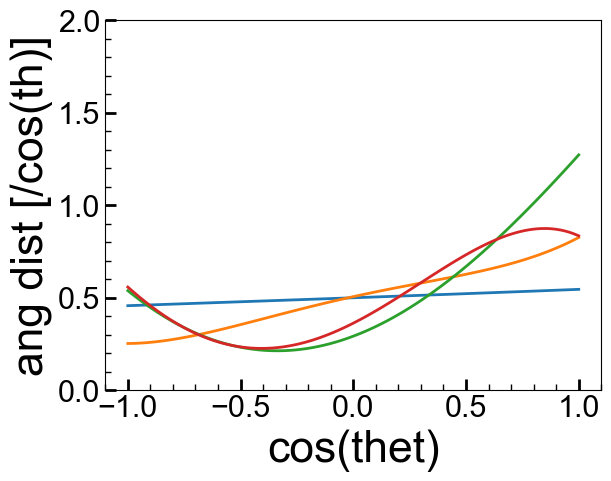

In [41]:
#plot quick
ct = np.linspace(-1.0,1.0,100)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(ct, adistv(ct))
plot(ct, adist1v(ct))
plot(ct, adist2v(ct))
plot(ct, adist3v(ct))
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(0.0,2)
xlabel('cos(thet)')
ylabel('ang dist [/cos(th)]')
show()

In [42]:
idx=[1,50,100,150]
print(en[idx]/1e6)

[0.04  0.896 1.158 1.542]


In [43]:
endfel.set_dir('xn_data/')
endfel.print_dir()

xn_data/


In [44]:
testfunc = endfel.al([0,1,2,3,4])

In [45]:
print(testfunc['a1'](1e6))

0.4312119136960494


In [46]:
print(testfunc)

{'a0': <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x16e25fdf0>, 'a1': <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x16e15f2b0>, 'a2': <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x16e15fe50>, 'a3': <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x16e15f5b0>, 'a4': <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x16e15fee0>}


In [47]:
dsdomeg=endfel.fetch_diff_xn(En=0.04e6)
dsdomegv=np.vectorize(dsdomeg)

dsdomeg1=endfel.fetch_diff_xn(En=0.896e6)
dsdomeg1v=np.vectorize(dsdomeg1)

dsdomeg2=endfel.fetch_diff_xn(En=1.158e6)
dsdomeg2v=np.vectorize(dsdomeg2)

dsdomeg3=endfel.fetch_diff_xn(En=1.542e6)
dsdomeg3v=np.vectorize(dsdomeg3)

dsdomeg4=endfel.fetch_diff_xn(En=1e6)
dsdomeg4v=np.vectorize(dsdomeg4)

1.0
0.029357000000000022
0.0003573399999999994
4.154000000000004e-05
2.227010781831287e-39
-9.5054578314758e-212
-1.4747885689072527e-252
-2.7936193830136525e-255
2.6517866398012072e-257
2.2424078517817993e-258
3.7216794774184354e-259
4.40719586287388e-261
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.18614
0.004114999999999999
0.002197900000000001
0.006373300000000001
2.9446208351725865e-180
-3.052823373527546e-223
1.768201487386136e-223
-1.6778899472531516e-225
-1.4187090103317015e-226
-2.3564307622206845e-227
-2.790267259665249e-229
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0000000000000002
0.26969000000000015
0.16472000000000003
-0.010602000000000006
-0.0014285
2.534045846832582e-150
-3.5381453651473537e-193
1.5019145412166855e-193
-1.4252034649531493e-195
-1.2050559907801704e-196
-2.0015617358105206e-197
-2.370064103417985e-199
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

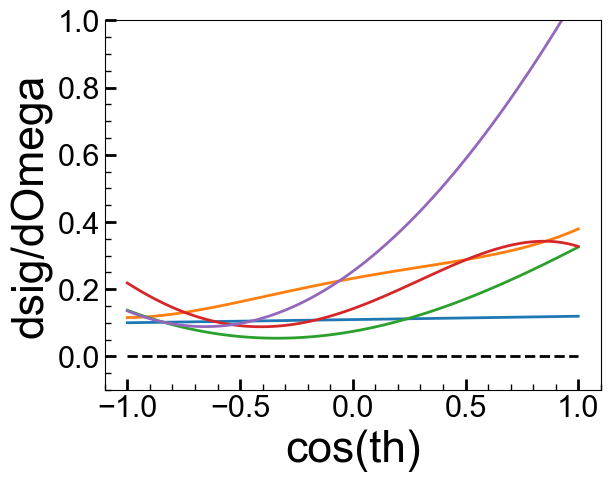

In [48]:
#plot quick
ct = np.linspace(-1.0,1.0,100)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(ct, dsdomegv(ct))
plot(ct, dsdomeg1v(ct))
plot(ct, dsdomeg2v(ct))
plot(ct, dsdomeg3v(ct))
plot(ct, dsdomeg4v(ct))
ax1.hlines(0,-1,1,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(-0.1,1.0)
xlabel('cos(th)')
ylabel('dsig/dOmega')
show()

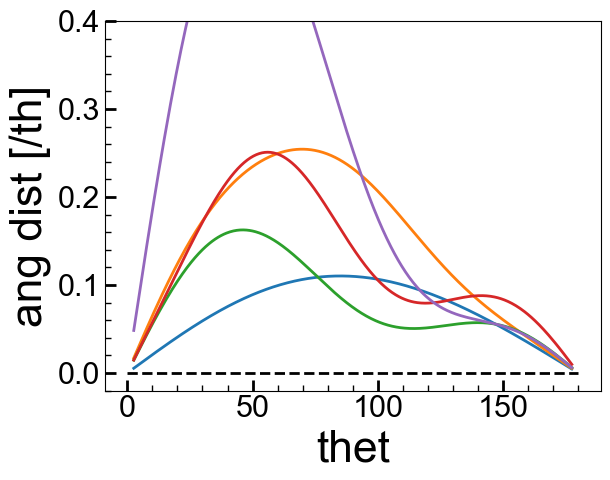

In [49]:

#plot quick
ct = np.linspace(-0.999,0.999,500)
thet = np.arccos(np.flip(ct))*(180/np.pi)
thetr = np.arccos(np.flip(ct))
fig = plt.figure()
ax1 = fig.add_subplot(111)
#plot(thet, (1/np.sin(thet))*np.flip(dsdomegv(ct)))
#plot(thet, (1/np.sin(thet))*np.flip(dsdomeg1v(ct)))
#plot(thet, (1/np.sin(thet))*np.flip(dsdomeg2v(ct)))
#plot(thet, (1/np.sin(thet))*np.flip(dsdomeg3v(ct)))
#plot(thet, (1/np.sin(thet))*np.flip(dsdomeg4v(ct)))

plot(thet, np.flip(dsdomegv(ct)))
plot(thet, np.flip(dsdomeg1v(ct)))
plot(thet, np.flip(dsdomeg2v(ct)))
plot(thet, np.flip(dsdomeg3v(ct)))
plot(thet, np.flip(dsdomeg4v(ct)))
#ax1.hlines(0,0,np.pi,'k',linestyle='--')
ax1.hlines(0,0,180,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(-0.02,0.4)
xlabel('thet')
ylabel('ang dist [/th]')
show()

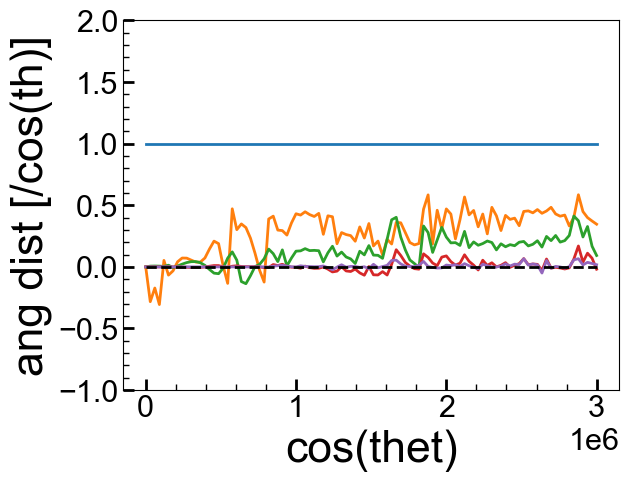

In [50]:
#plot quick
en = np.linspace(0,3e6,100)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(en, testfunc['a0'](en))
plot(en, testfunc['a1'](en))
plot(en, testfunc['a2'](en))
plot(en, testfunc['a3'](en))
plot(en, testfunc['a4'](en))
ax1.hlines(0,0,3e6,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(-1.0,2)
xlabel('cos(thet)')
ylabel('ang dist [/cos(th)]')
show()